# Beyond Search: Unifying Azure Cognitive Search's Custom Skills, OpenAI Embeddings, and LLMs for Data-Driven Conversations

In today's data-driven landscape, efficient information retrieval and intelligent interactions are pivotal in extracting the maximum value from the vast repository of digital content. This quest for enhancing data utilization has led to the convergence of cutting-edge technologies that transcend traditional search paradigms. Enter Azure Cognitive Search – Microsoft's powerful cloud-based search service that transforms raw data into actionable insights.

Custom skills, a flagship feature of Azure Cognitive Search, empowers developers and data enthusiasts to reshape the indexing pipeline according to their unique requirements. By inserting tailored code and external services into this pipeline, data processing transcends conventional boundaries, opening the doors to a multitude of custom actions.

This personal portfolio project embarks on an enlightening exploration of custom skills within Azure Cognitive Search, delving into the intricate amalgamation of AI and search. We'll do this by dissecting a custom skill developed by Microsoft, the Azure Open AI Embeddings Generator and which is open source here: https://github.com/Azure-Samples/azure-search-power-skills/blob/main/Vector/EmbeddingGenerator/README.md

However, our journey doesn't stop at search efficiency. With the advent of OpenAI Embedding Generator, a powerful Azure function, we bridge the gap between indexing and intelligent interactions. Imagine a world where search is not limited to keywords and phrases, but extends to the semantic realm – where documents aren't just indexed, but understood at a deeper level. We unravel the magic behind the OpenAI Embedding Generator, which breathes life into the data, generating rich embeddings that pave the way for novel AI applications.

But the story doesn't end there. These embeddings become the cornerstone for the Language Model applications (LLMs) and chatbots of the future. Our project encapsulates the seamless fusion of indexed data, embeddings, and advanced AI models, culminating in a symphony of human-like interactions. LLMs don't just generate text; they craft narratives, answer queries, and dive into the reservoir of knowledge locked within your data.

Join us on this enthralling journey as we demystify the amalgamation of Azure Cognitive Search, OpenAI Embedding Generator, and Language Models. Discover how the indexing pipeline evolves into a dynamic narrative generator, and how search transcends into insightful conversations. As we navigate through the technical intricacies and the transformative potential, we invite you to envision the dawn of a new era in data-driven interactions.

Are you ready to delve into the heart of enhanced search and AI-driven conversations? Let's embark on this transformative expedition together.
Stay tuned for the chapters that unveil the magic of Azure Cognitive Search, the prowess of OpenAI Embeddings, and the marvel of Language Models.

## Portfolio Project Part 1 - Azure Open AI Embeddings Generator as a Cognitive Search custom skill


### Azure Cognitive Search custom skills

Custom skills are a powerful feature that allow you to extend the capabilities of Azure Cognitive Search's indexing pipeline. When you ingest data into Azure Cognitive Search for indexing, it goes through a series of processing steps to tokenize, normalize, and prepare the data for search. Custom skills allow you to insert your own custom code or external services at different points in this processing pipeline, enabling you to perform custom actions on the data before it is indexed.

These custom actions can include tasks such as:

**Text extraction and analysis:** You can use custom skills to extract specific information from documents, such as named entities, keywords, or sentiment analysis scores. This can enhance the search experience by providing more context to users.

**Language translation:** If you have content in multiple languages, you can use custom skills to translate the content into a common language for indexing, making your search system multilingual.

**Image analysis:** If your search data includes images, you can use custom skills to analyze the images and extract useful information, such as object recognition, image captions, or other metadata.

**Data enrichment:** You can use external data sources or APIs to enrich your indexed data. For example, you could use a custom skill to retrieve additional information about a product from an external database and include that information in the indexed content.

**Entity recognition:** You can identify and tag specific entities in your data, such as names of people, locations, organizations, or product names, which can help improve search accuracy and relevance.

To implement a custom skill, you generally need to provide a function or a web service endpoint that performs the desired action on the data. Azure Cognitive Search then invokes this function or endpoint as part of the indexing process.

### Azure Open AI Embedding Generator

This project is about understanding what happens with documents once its passed into the indexing pipeline in Azure Cognitive Search where you configured a Power Skill, (OpenAI Embeddings).  This Power Skill actually generates the embedddings and stores them, which is crutial in order to be able to do similarity search later and use an LLM model for generating text based on internal documents that you have indexed.

The code is open sourced from Microsoft and you can find it here: https://github.com/Azure-Samples/azure-search-power-skills/blob/main/Vector/EmbeddingGenerator/README.md


#### Document


This code defines a Python data model for representing documents. The class is named Document, and it is created using Python's dataclasses module, which helps to simplify the creation of classes by automatically generating special methods like __init__, __repr__, and __eq__ based on the class attributes.

##### Class Attributes:
The Document class has several attributes:

a. **content:** This attribute represents the content of the document and is of type str. It is a required attribute, and every Document object must have a content value.

b. **id:** An optional attribute of type str, representing the unique identifier of the document. If provided, it can be used to uniquely identify a document in a collection.

c. **title:** An optional attribute of type str, representing the title of the document. If provided, it contains the title or name of the document.

d. **filepath:** An optional attribute of type str, representing the file path of the document. If provided, it holds the path to the location of the document in the file system.

e. **url:** An optional attribute of type str, representing the URL of the document. If provided, it can store the web address or location of the document on the internet.

f. **embedding_metadata:** An optional attribute of type Dict, representing the metadata associated with the document's embedding (a numerical representation of the document's content). If provided, it can store additional information related to the embedding process, such as model version, hyperparameters, etc.

In [ ]:
from dataclasses import dataclass
from typing import Dict, Optional


@dataclass
class Document():
    """A data class for storing documents

    Attributes:
        content (str): The content of the document.
        id (Optional[str]): The id of the document.
        title (Optional[str]): The title of the document.
        filepath (Optional[str]): The filepath of the document.
        url (Optional[str]): The url of the document.
        metadata (Optional[Dict]): The metadata of the document.    
    """

    content: str
    id: Optional[str] = None
    title: Optional[str] = None
    filepath: Optional[str] = None
    url: Optional[str] = None
    embedding_metadata: Optional[Dict] = None

#### ChunkingResult

The '@dataclass' decorator is applied to this class, which is a feature provided by Python's dataclasses module. By using this decorator, we can create a class with automatically generated special methods like init, repr, and eq, based on the class attributes. It significantly reduces boilerplate code that would typically be written for these special methods.

##### Class Attributes:
Inside the 'ChunkingResult' class, we have several attributes:

a. **'chunks':** This attribute is a list of 'Document' objects representing the individual chunks obtained from the chunking process.

b. **'total_files':** An integer representing the total number of files processed during chunking.

c. **'num_unsupported_format_files':** An optional integer (with a default value of 0) indicating the number of files with unsupported formats. This attribute is useful if some files couldn't be processed due to unsupported formats.

d. **'num_files_with_errors':** Another optional integer (defaulted to 0) representing the number of files that encountered errors during chunking. This attribute is useful for tracking the number of files that failed to process successfully.

e. **'skipped_chunks':** An optional integer (defaulted to 0) indicating the number of chunks that were skipped during chunking. This attribute might be helpful if some chunks are excluded from processing for specific reasons.

In [ ]:
"""Data model for chunking result

Classes:
    ChunkingResult: Data model for chunking result.
"""
from dataclasses import dataclass

from typing import List
from .document import Document


@dataclass
class ChunkingResult:
    """Data model for chunking result

    Attributes:
        chunks (List[Document]): List of chunks.
        total_files (int): Total number of files.
        num_unsupported_format_files (int): Number of files with unsupported format.
        num_files_with_errors (int): Number of files with errors.
        skipped_chunks (int): Number of chunks skipped.
    """
    chunks: List[Document]
    total_files: int
    num_unsupported_format_files: int = 0
    num_files_with_errors: int = 0
    skipped_chunks: int = 0

#### TokenEstimator

Very self explanatory, it just let us know the Token Length of some text. We can use any encoding here.

```python
# Example usage:
estimator = TokenEstimator()
text_to_estimate = "This is a sample text to estimate tokens."
num_tokens = estimator.estimate_tokens(text_to_estimate)
print(f"Number of tokens in the text: {num_tokens}")
```


In [ ]:
import tiktoken

class TokenEstimator():
    GPT2_TOKENIZER = tiktoken.get_encoding("gpt2")

    def estimate_tokens(self, text: str) -> int:
        return len(self.GPT2_TOKENIZER.encode(text))

#### TextChunker

This codes is the main responsible to split the text into chunks. It uses langchain MarkdownTextSplitter, RecursiveCharacterTextSplitter, PythonCodeTextSplitter.

The main method: chunk_conten takes a piece of content and breaks it down into smaller chunks. It's used to split large documents into smaller segments for processing or analysis. Some comments were added in the code to improve readability.

In [ ]:
import os
from typing import Generator, List, Optional, Tuple
from .document import Document
from .chunking_result import ChunkingResult
from .token_estimator import TokenEstimator
from langchain.text_splitter import MarkdownTextSplitter, RecursiveCharacterTextSplitter, PythonCodeTextSplitter

class UnsupportedFormatError(Exception):
    """Exception raised when a format is not supported."""
    pass


class TextChunker():
    """Text chunker class.

    Attributes:
        supported_formats (List[str]): List of supported file formats.
    """
    FILE_FORMAT_DICT = {
        "md": "markdown",
        "txt": "text",
        "html": "html",
        "shtml": "html",
        "htm": "html",
        "py": "python",
        "pdf": "pdf",
    }
    SENTENCE_ENDINGS = [".", "!", "?"]
    WORDS_BREAKS = ['\n', '\t', '}', '{', ']', '[', ')', '(', ' ', ':', ';', ',']
    TOKEN_ESTIMATOR = TokenEstimator()

    def _get_file_format(self, file_path: str) -> Optional[str]:
        """Gets the file format from the file name.
        Returns None if the file format is not supported.
        Args:
            file_path (str): The file path of the file whose format needs to be retrieved.
        Returns:
            str: The file format.
        """
        # in case the caller gives us a file path
        file_path = os.path.basename(file_path)
        file_extension = file_path.split(".")[-1]
        return self.FILE_FORMAT_DICT.get(file_extension, None)

    def _chunk_content_helper(self,
            content: str, file_format: str, file_path: Optional[str],
            token_overlap: int,
            num_tokens: int
    ) -> Generator[Tuple[str, int, Document], None, None]:

        if file_format == "markdown":
            splitter = MarkdownTextSplitter.from_tiktoken_encoder(chunk_size=num_tokens, chunk_overlap=token_overlap)
        elif file_format == "python":
            splitter = PythonCodeTextSplitter.from_tiktoken_encoder(chunk_size=num_tokens, chunk_overlap=token_overlap)
        else:
            splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
                separators=self.SENTENCE_ENDINGS + self.WORDS_BREAKS,
                chunk_size=num_tokens, chunk_overlap=token_overlap)
        chunked_content_list = splitter.split_text(content)
        for chunked_content in chunked_content_list:
            chunk_size = self.TOKEN_ESTIMATOR.estimate_tokens(chunked_content)
            yield chunked_content, chunk_size, content


   

    def chunk_content(
        self,
        content: str,
        file_path: Optional[str] = None,
        url: Optional[str] = None,
        ignore_errors: bool = True,
        num_tokens: int = 2048,
        min_chunk_size: int = 10,
        token_overlap: int = 0
    ) -> ChunkingResult:
        """Chunks the given content. If ignore_errors is true, returns None
         in case of an error
        Args:
            content (str): The content to chunk.
            file_path (str): The file name. used for title, file format detection.
            url (str): The url. used for title.
            ignore_errors (bool): If true, ignores errors and returns None.
            num_tokens (int): The number of tokens in each chunk.
            min_chunk_size (int): The minimum chunk size below which chunks will be filtered.
            token_overlap (int): The number of tokens to overlap between chunks.
        Returns:
            List[Document]: List of chunked documents.
        """

        try:
            # Determine the file format based on the file_path (if provided) or default to "text."
            if file_path is None:
                file_format = "text"
            else:
                file_format = self._get_file_format(file_path)
                if file_format is None:
                    raise UnsupportedFormatError(
                        f"{file_path} is not supported")

            # Break down the content into chunks using the _chunk_content_helper method.
            chunked_context = self._chunk_content_helper(
                content=content,
                file_path=file_path,
                file_format=file_format,
                num_tokens=num_tokens,
                token_overlap=token_overlap
            )
            chunks = []
            skipped_chunks = 0
            for chunk, chunk_size, doc in chunked_context:
                # Check if the chunk size meets the minimum requirement.
                if chunk_size >= min_chunk_size:
                    # Append the chunk as a Document object to the chunks list.
                    chunks.append(
                        Document(
                            content=chunk,
                            title=file_path,
                            url=url,
                            filepath=file_path
                        )
                    )
                else:
                    # Increment the skipped_chunks counter if the chunk is too small.
                    skipped_chunks += 1

        except UnsupportedFormatError as e:
            # Handle UnsupportedFormatError if ignore_errors is True, otherwise raise the exception.
            if ignore_errors:
                return ChunkingResult(
                    chunks=[], total_files=1, num_unsupported_format_files=1
                )
            else:
                raise e
        except Exception as e:
            # Handle any other exception if ignore_errors is True, otherwise raise the exception.
            if ignore_errors:
                return ChunkingResult(chunks=[], total_files=1, num_files_with_errors=1)
            else:
                raise e

        # Return the result of the chunking process as a ChunkingResult object.
        return ChunkingResult(
            chunks=chunks,
            total_files=1,
            skipped_chunks=skipped_chunks,
        )

#### ChunkEmbeddingHelper

The code defines a `ChunkEmbeddingHelper` class to generate embeddings for content chunks using `TextEmbedder`. The `generate_chunks_with_embedding` method processes large documents in smaller parts, embedding each chunk separately. It introduces delays between embedding calls to avoid exceeding the OpenAI API rate limit. The `_generate_content_metadata` method creates metadata for each chunk, including field name, document ID, index, offset, length, and embedding. This approach allows efficient processing of large texts and enables individual analysis of content chunks.

In [ ]:
import time
from embedder.text_embedder import TextEmbedder

class ChunkEmbeddingHelper():
    def __init__(self):
        self.text_embedder = TextEmbedder()

    def generate_chunks_with_embedding(self, document_id, content_chunks, fieldname, sleep_interval_seconds) ->  dict:
        offset = 0
        chunk_embeddings = []
        for index, (content_chunk) in enumerate(content_chunks):
            metadata = self._generate_content_metadata(document_id, fieldname, index, content_chunk, offset)
            offset += metadata['length']
            chunk_embeddings.append(metadata)
            
            # A very crude way to introduce some delay between each embedding call
            # This is to avoid hitting the rate limit of the OpenAI API
            time.sleep(sleep_interval_seconds)
        return chunk_embeddings

    def _generate_content_metadata(self, document_id, fieldname, index, content, offset):
        metadata = {'fieldname':fieldname}
        metadata['docid'] = document_id
        metadata['index'] = index
        metadata['offset'] = offset
        metadata['length'] = len(content)
        metadata['embedding'] = self.text_embedder.embed_content(content)
        return metadata

#### TextEmbedder

This code defines a TextEmbedder class responsible for embedding text using the Azure OpenAI API. It sets up the API connection and handles embedding requests. The clean_text method removes unnecessary spaces and truncates the text if it exceeds a specified limit. The embed_content method retries embedding requests using exponential backoff in case of errors. It returns the embedding of the provided text with adjustable precision, using the Azure OpenAI API. The class is designed to facilitate embedding text and handling potential API issues while ensuring a smooth and reliable process.

In [ ]:
import openai
import os
import re
import logging
from tenacity import retry, wait_random_exponential, stop_after_attempt  

class TextEmbedder():
    openai.api_type = "azure"    
    openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")
    openai.api_base = f"https://{os.getenv('AZURE_OPENAI_SERVICE_NAME')}.openai.azure.com/"
    openai.api_version = os.getenv("AZURE_OPENAI_API_VERSION")
    AZURE_OPENAI_EMBEDDING_DEPLOYMENT = os.getenv("AZURE_OPENAI_EMBEDDING_DEPLOYMENT")

    def clean_text(self, text, text_limit=7000):
        # Clean up text (e.g. line breaks, )    
        text = re.sub(r'\s+', ' ', text).strip()
        text = re.sub(r'[\n\r]+', ' ', text).strip()
        # Truncate text if necessary (e.g. for, ada-002, 4095 tokens ~ 7000 chracters)    
        if len(text) > text_limit:
            logging.warning("Token limit reached exceeded maximum length, truncating...")
            text = text[:text_limit]
        return text

    @retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
    def embed_content(self, text, clean_text=True, use_single_precision=True):
        embedding_precision = 9 if use_single_precision else 18
        if clean_text:
            text = self.clean_text(text)
        response = openai.Embedding.create(input=text, engine=self.AZURE_OPENAI_EMBEDDING_DEPLOYMENT)
        embedding = [round(x, embedding_precision) for x in response['data'][0]['embedding']]
        return embedding

#### The function

Its an HTTP Trigger that implements text chunking and embedding using the Azure OpenAI API. The function expects a JSON request containing a list of documents, each with a unique identifier (recordId) and relevant data fields (text, document_id, filepath, and fieldname). The text from each document is processed using the `TextChunker` and `ChunkEmbeddingHelper` classes.

The `text_chunking` function receives HTTP requests and validates the JSON payload against a predefined schema using jsonschema. If the request is invalid, it returns an error response.

The function retrieves environment variables related to the Azure OpenAI API and text chunking parameters (e.g., `NUM_TOKENS, MIN_CHUNK_SIZE, TOKEN_OVERLAP, AZURE_OPENAI_EMBEDDING_SLEEP_INTERVAL_SECONDS`).

It iterates through each document in the request, chunks the text content into smaller segments using the `TEXT_CHUNKER` object, and generates embeddings for each chunk using the `CHUNK_METADATA_HELPER` object. The sleep_interval_seconds introduces delays between embedding calls to avoid API rate limits.

For each chunk, the function stores the embedding metadata in the original chunk object.

The resulting chunked data is assembled into a response JSON and returned.

The `get_request_schema` function defines the JSON schema for the request payload, ensuring it contains the required fields and proper data types.

In [ ]:
import azure.functions as func
import os
import logging
import json
import jsonschema
from chunker.text_chunker import TextChunker
from chunker.chunk_metadata_helper import ChunkEmbeddingHelper

app = func.FunctionApp()

TEXT_CHUNKER = TextChunker()
CHUNK_METADATA_HELPER = ChunkEmbeddingHelper()

"""
Required environment variables:
"AZURE_OPENAI_API_KEY"
"AZURE_OPENAI_API_VERSION"
"AZURE_OPENAI_EMBEDDING_DEPLOYMENT"
"AZURE_OPENAI_SERVICE_NAME"

Optional environment variables:
"AZURE_OPENAI_EMBEDDING_SLEEP_INTERVAL_SECONDS" (default: 1)
"""

@app.function_name(name="TextEmbedder")
@app.route(route="chunk-embed")
def text_chunking(req: func.HttpRequest) -> func.HttpResponse:

    logging.info('Python HTTP trigger function processed a request.')
    
    sleep_interval_seconds = int(os.getenv("AZURE_OPENAI_EMBEDDING_SLEEP_INTERVAL_SECONDS", "1"))
    num_tokens = int(os.getenv("NUM_TOKENS", "2048"))
    min_chunk_size = int(os.getenv("MIN_CHUNK_SIZE", "10"))
    token_overlap = int(os.getenv("TOKEN_OVERLAP", "0"))

    request = req.get_json()

    try:
        jsonschema.validate(request, schema=get_request_schema())
    except jsonschema.exceptions.ValidationError as e:
        return func.HttpResponse("Invalid request: {0}".format(e), status_code=400)

    values = []
    for value in request['values']:
        recordId = value['recordId']
        document_id = value['data']['document_id']
        text = value['data']['text']
        filepath = value['data']['filepath']
        fieldname = value['data']['fieldname']
    
        # chunk documents into chunks of (by default) 2048 tokens, and for each chunk, generate the vector embedding
        chunking_result = TEXT_CHUNKER.chunk_content(text, file_path=filepath, num_tokens=num_tokens, min_chunk_size=min_chunk_size, token_overlap=token_overlap)
        content_chunk_metadata = CHUNK_METADATA_HELPER.generate_chunks_with_embedding(document_id, [c.content for c in chunking_result.chunks], fieldname, sleep_interval_seconds)

        for document_chunk, embedding_metadata in zip(chunking_result.chunks, content_chunk_metadata):
            document_chunk.embedding_metadata = embedding_metadata

        values.append({
            "recordId": recordId,
            "data": chunking_result,
            "errors": None,
            "warnings": None
        })


    response_body = { "values": values }

    logging.info(f'Python HTTP trigger function created {len(chunking_result.chunks)} chunks.')

    response = func.HttpResponse(json.dumps(response_body, default=lambda obj: obj.__dict__))
    response.headers['Content-Type'] = 'application/json'    
    return response

def get_request_schema():
    return {
        "$schema": "http://json-schema.org/draft-04/schema#",
        "type": "object",
        "properties": {
            "values": {
                "type": "array",
                "minItems": 1,
                "items": {
                    "type": "object",
                    "properties": {
                        "recordId": {"type": "string"},
                        "data": {
                            "type": "object",
                            "properties": {
                                "text": {"type": "string", "minLength": 1},
                                "document_id": {"type": "string", "minLength": 1},
                                "filepath": {"type": "string", "minLength": 1},
                                "fieldname": {"type": "string", "minLength": 1}
                            },
                            "required": ["text", "document_id", "filepath", "fieldname"],
                        },
                    },
                    "required": ["recordId", "data"],
                },
            }
        },
        "required": ["values"],
    }

#### Testing it locally

In order to test it locally, we use PostMan, first we press F5 in our VS Code project, this will launch the project and will allow us to make HTTP calls locally. When you press F5 you will see in the terminal Window something like this, your REST API is ready for testing

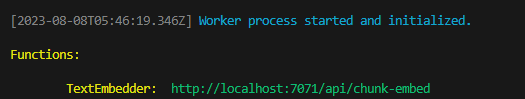

Now in Postman just create a new Request, in the body select raw and paste:

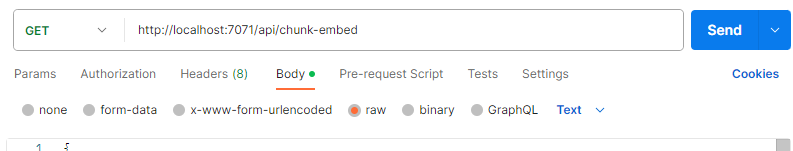

```json
{
    "values": [
        {
            "recordId": "1234",
            "data": {
                "document_id": "12345ABC",
                "text": "This is a test document and it is big enough to ensure that it meets the minimum chunk size. But what about if we want to chung it",
                "filepath": "foo.md",
                "fieldname": "content"
            }
        }
    ]
}```


If it works, then you will get the embeddings like this:

```json
{
    "values": [
        {
            "recordId": "1234",
            "data": {
                "chunks": [
                    {
                        "content": "This is a test document and it is big enough to ensure that it meets the minimum chunk size. But what about if we want to chung it",
                        "id": null,
                        "title": "foo.md",
                        "filepath": "foo.md",
                        "url": null,
                        "embedding_metadata": {
                            "fieldname": "content",
                            "docid": "12345ABC",
                            "index": 0,
                            "offset": 0,
                            "length": 130,
                            "embedding": [
                                0.011029272,
                                0.012983655,
                                0.02085585,
                                0.01010675,
                                -0.014309354,
                                0.025529964,
                                -0.02235922,
                                -0.00876055,
                                -0.016605411,
                                -0.033484161,
                                0.022085879,
                                0.03225413,
                                0.011801459,
                                0.009225228,
```

#### Deployment

So you test it locally, now just deploy it to Azure Functions by just following these guidelines: https://github.com/Azure-Samples/azure-search-power-skills/blob/main/Vector/EmbeddingGenerator/README.md


#### Integration of Azure Function as Custom Skill

In order to use this skill in a cognitive search pipeline, you'll need to add a skill definition to your skillset. Here's a sample skill definition for this example (inputs and outputs should be updated to reflect your particular scenario and skillset environment.
On your Cognitive Search environment click on SkillSets

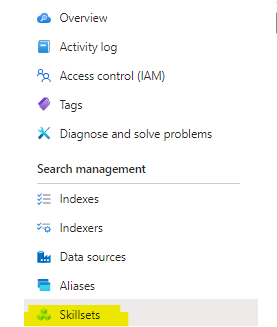

Then Add SkillSet

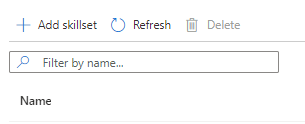

Then copy the code below inside the `skill[]` array:

```json
{
    "@odata.type": "#Microsoft.Skills.Custom.WebApiSkill",
    "description": "Acronym linker",
    "uri": "[AzureFunctionEndpointUrl]/api/chunk-embed?code=[AzureFunctionDefaultHostKey]",
    "batchSize": 1,
    "context": "/document/content",
    "inputs": [
        {
            "name": "document_id",
            "source": "/document/document_id"
        },
        {
            "name": "text",
            "source": "/document/content"
        },
        {
            "name": "filepath",
            "source": "/document/file_path"
        },
        {
            "name": "fieldname",
            "source": "='content'"
        }
    ],
    "outputs": [
        {
            "name": "chunks",
            "targetName": "chunks"
        }
    ]
}


For reference the entire json will look like this:

```json
{
  "name": "skillset1691474262532",
  "description": "",
  "skills": [{
    "@odata.type": "#Microsoft.Skills.Custom.WebApiSkill",
    "description": "Azure Open AI Embeddings Generator",
    "uri": "[AzureFunctionEndpointUrl]/api/chunk-embed?code=[AzureFunctionDefaultHostKey]",
    "batchSize": 1,
    "context": "/document/content",
    "inputs": [
        {
            "name": "document_id",
            "source": "/document/document_id"
        },
        {
            "name": "text",
            "source": "/document/content"
        },
        {
            "name": "filepath",
            "source": "/document/file_path"
        },
        {
            "name": "fieldname",
            "source": "='content'"
        }
    ],
    "outputs": [
        {
            "name": "chunks",
            "targetName": "chunks"
        }
    ]
}],
  "cognitiveServices": {
    "@odata.type": "#Microsoft.Azure.Search.DefaultCognitiveServices"
  }
}


Be sure to replace the Azure Function URL and the Code (API KEY)

### Conclusion

Congratulations, dear reader, for embarking on this illuminating journey into the realm where data insights seamlessly evolve into dynamic interactions. You've delved into the intricacies of Azure Cognitive Search's custom skills, witnessed the transformative power of the OpenAI Embedding Generator, and mastered the art of crafting a tailored ecosystem that transcends conventional search boundaries.

As we reach the conclusion of this chapter, it's only the beginning of what promises to be an exciting saga. The path we've traversed, from understanding the intricacies of custom skills to unlocking the potential of embedding generation, is merely a stepping stone. There's a world of possibilities ahead, waiting to be unveiled in the upcoming second part of this series.

In the forthcoming installment, we'll venture even deeper, exploring how these enriched indexes and embeddings fuel the capabilities of advanced Language Models. Imagine conversing with an AI that not only comprehends your queries but comprehends them in the context of your data. Envision a future where interactions with information are as fluid and natural as a conversation with a colleague.

Stay tuned as we dive into the heart of Language Models and chatbot integrations. We'll reveal how the bridges we've built between search, embeddings, and AI models transform the way we interact with our data. In the world of tomorrow, knowledge isn't just at your fingertips – it's within your conversational grasp.

Thank you for joining us on this path of innovation and exploration. Until the second part unveils its wonders, keep dreaming, keep experimenting, and keep pioneering the future where insights and interactions converge in ways yet unimagined.

See you in Part 2!